In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('DataScientist.csv',error_bad_lines=False, engine="python")
df.head()

Skipping line 1088: unexpected end of data


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [ ]:
df.shape

(1086, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1086 non-null   int64  
 1   index              1086 non-null   int64  
 2   Job Title          1086 non-null   object 
 3   Salary Estimate    1086 non-null   object 
 4   Job Description    1086 non-null   object 
 5   Rating             1086 non-null   float64
 6   Company Name       1086 non-null   object 
 7   Location           1086 non-null   object 
 8   Headquarters       1086 non-null   object 
 9   Size               1086 non-null   object 
 10  Founded            1086 non-null   int64  
 11  Type of ownership  1086 non-null   object 
 12  Industry           1086 non-null   object 
 13  Sector             1086 non-null   object 
 14  Revenue            1086 non-null   object 
 15  Competitors        1086 non-null   object 
 16  Easy Apply         1086 

In [ ]:
df.describe()

,Unnamed: 0,index,Rating,Founded
count,1086.000000,1086.000000,1086.000000,1086.000000
mean,542.500000,619.495396,3.242634,1541.661142
std,313.645501,356.897356,1.617290,823.163366
min,0.000000,0.000000,-1.000000,-1.000000
25%,271.250000,328.500000,3.200000,1857.000000
50%,542.500000,612.500000,3.700000,1990.500000
75%,813.750000,922.750000,4.100000,2006.000000
max,1085.000000,1230.000000,5.000000,2019.000000


**Data Cleaning**

**Droping useless columns**

In [ ]:
df.drop(["Unnamed: 0","index","Competitors","Easy Apply","Job Description"],axis=1,inplace=True)
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [ ]:
df = df.replace([-1, -1.0, '-1'], np.nan)
df['Revenue'].replace(['Unknown / Non-Applicable'], np.nan, inplace = True)
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN
2,Data Science Manager,$111K-$181K (Glassdoor est.),NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,NaN
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,NaN
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN


**Spiltting Salary estimate**

In [ ]:
df['Salary Estimate']= df['Salary Estimate'].str.replace('(', '')
df['Salary Estimate']= df['Salary Estimate'].str.replace(')', '')
df['Salary Estimate']= df['Salary Estimate'].str.replace('Glassdoor est.', '')
df['Salary Estimate']= df['Salary Estimate'].str.replace('Employer est.', '')

In [ ]:
df_salary = df['Salary Estimate'].str.split("-",expand=True)
df['Min_Salary'] = df_salary[0]
df['Max_Salary']= df_salary[1]
df['Max_Salary'] = df['Max_Salary'].str.replace('Per Hour','')
df['Min_Salary']=df['Min_Salary'].str.strip(' ').str.strip('$').str.strip('K').fillna(0).astype(int)
df['Max_Salary']=df['Max_Salary'].str.strip(' ').str.strip('$').str.strip('K').fillna(0).astype(int)

In [ ]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary
0,Senior Data Scientist,$111K-$181K,3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,111,181
1,"Data Scientist, Product Analytics",$111K-$181K,4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,111,181
2,Data Science Manager,$111K-$181K,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,NaN,111,181
3,Data Analyst,$111K-$181K,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,NaN,111,181
4,"Director, Data Science",$111K-$181K,3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,111,181


In [ ]:
df.drop("Salary Estimate",axis=1)

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary
0,Senior Data Scientist,3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,111,181
1,"Data Scientist, Product Analytics",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,111,181
2,Data Science Manager,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,NaN,111,181
3,Data Analyst,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,NaN,111,181
4,"Director, Data Science",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,111,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,Research Scientist - Data Science (Earth & Atm...,4.4,University of Houston\n4.4,"Houston, TX","Houston, TX",10000+ employees,NaN,College / University,Colleges & Universities,Education,$500 million to $1 billion (USD),90,175
1082,Pipeline Integrity - Data Scientist,3.4,Kinder Morgan\n3.4,"Houston, TX","Houston, TX",10000+ employees,1997.0,Company - Public,Oil & Gas Services,"Oil, Gas, Energy & Utilities",$10+ billion (USD),90,175
1083,Data Visualization and Analytics Consultant,4.1,Slalom LLC.\n4.1,"Houston, TX","Seattle, WA",5001 to 10000 employees,2001.0,Company - Private,Consulting,Business Services,$1 to $2 billion (USD),90,175
1084,Data Engineer,3.3,Trace3\n3.3,"Houston, TX","Irvine, CA",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$1 to $2 billion (USD),90,175


In [ ]:
df['Size'] = df['Size'].str.replace('employees', '')
df['Size'] = df['Size'].str.replace('+', 'p')
df['Size'] = df['Size'].replace('Unknown', None)
df['Size'] = df['Size'].str.replace('10000p', '10000 to 10100')
size = df['Size'].str.split("to",expand=True)
df['Min_Size'] = size[0].astype('float')
df['Max_Size'] = size[1].astype('float')
df.head()


,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Min_Size,Max_Size
0,Senior Data Scientist,$111K-$181K,3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,111,181,501.0,1000.0
1,"Data Scientist, Product Analytics",$111K-$181K,4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,111,181,1001.0,5000.0
2,Data Science Manager,$111K-$181K,NaN,Decode_M,"New York, NY","New York, NY",1 to 50,NaN,Unknown,NaN,NaN,NaN,111,181,1.0,50.0
3,Data Analyst,$111K-$181K,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500,2019.0,Company - Private,Internet,Information Technology,NaN,111,181,201.0,500.0
4,"Director, Data Science",$111K-$181K,3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,111,181,51.0,200.0


In [ ]:
df.drop("Size",axis=1)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Min_Size,Max_Size
0,Senior Data Scientist,$111K-$181K,3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,111,181,501.0,1000.0
1,"Data Scientist, Product Analytics",$111K-$181K,4.5,Noom US\n4.5,"New York, NY","New York, NY",2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,111,181,1001.0,5000.0
2,Data Science Manager,$111K-$181K,NaN,Decode_M,"New York, NY","New York, NY",NaN,Unknown,NaN,NaN,NaN,111,181,1.0,50.0
3,Data Analyst,$111K-$181K,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",2019.0,Company - Private,Internet,Information Technology,NaN,111,181,201.0,500.0
4,"Director, Data Science",$111K-$181K,3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,111,181,51.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,Research Scientist - Data Science (Earth & Atm...,$90K-$175K,4.4,University of Houston\n4.4,"Houston, TX","Houston, TX",NaN,College / University,Colleges & Universities,Education,$500 million to $1 billion (USD),90,175,10000.0,10100.0
1082,Pipeline Integrity - Data Scientist,$90K-$175K,3.4,Kinder Morgan\n3.4,"Houston, TX","Houston, TX",1997.0,Company - Public,Oil & Gas Services,"Oil, Gas, Energy & Utilities",$10+ billion (USD),90,175,10000.0,10100.0
1083,Data Visualization and Analytics Consultant,$90K-$175K,4.1,Slalom LLC.\n4.1,"Houston, TX","Seattle, WA",2001.0,Company - Private,Consulting,Business Services,$1 to $2 billion (USD),90,175,5001.0,10000.0
1084,Data Engineer,$90K-$175K,3.3,Trace3\n3.3,"Houston, TX","Irvine, CA",2002.0,Company - Private,IT Services,Information Technology,$1 to $2 billion (USD),90,175,501.0,1000.0


**Analysis of Data Set**

In [ ]:
df["Job Title"].value_counts()


Data Scientist                   138
Data Analyst                      87
Data Engineer                     84
Senior Data Scientist             52
Senior Data Analyst               17
                                ... 
Data Scientist Consultant          1
Clinical Safety Scientist I        1
Data Scientist/ML Engineer         1
Data Engineer SQL-PLSQL-HANA       1
Data Scientist, Acorn AI Labs      1
Name: Job Title, Length: 541, dtype: int64

In [ ]:
df['Rating'].value_counts()

3.9    97
3.7    85
3.8    70
3.6    66
3.4    59
4.0    55
5.0    51
3.3    48
3.5    47
4.1    45
3.2    42
4.2    31
4.4    30
4.7    27
4.5    26
3.1    25
4.6    19
2.9    18
4.3    18
2.8    16
4.9    14
3.0    14
4.8    12
2.7    10
2.5     7
2.6     7
2.4     6
1.0     5
2.2     4
1.6     4
2.1     3
2.0     2
2.3     2
1.9     1
Name: Rating, dtype: int64

In [ ]:
df["Size"].value_counts()


10000 to 10100     226
1 to 50            173
1001 to 5000       171
51 to 200          168
201 to 500         121
501 to 1000         98
5001 to 10000       60
Name: Size, dtype: int64

In [ ]:
df['Founded'].value_counts()

2015.0    38
2014.0    36
2001.0    29
1994.0    27
2003.0    27
          ..
1918.0     1
1970.0     1
1975.0     1
1937.0     1
1852.0     1
Name: Founded, Length: 123, dtype: int64

In [ ]:
df['Type of ownership'].value_counts()

Company - Private                 582
Company - Public                  257
Subsidiary or Business Segment     58
Nonprofit Organization             57
Government                         16
Unknown                            13
College / University               12
Hospital                            8
Private Practice / Firm             5
School / School District            4
Contract                            3
Self-employed                       3
Franchise                           1
Name: Type of ownership, dtype: int64

In [ ]:
df['Industry'].value_counts()

IT Services                              99
Internet                                 94
Staffing & Outsourcing                   76
Health Care Services & Hospitals         58
Advertising & Marketing                  53
                                         ..
Chemical Manufacturing                    1
Commercial Equipment Rental               1
Electrical & Electronic Manufacturing     1
Health Fundraising Organizations          1
Consumer Product Rental                   1
Name: Industry, Length: 71, dtype: int64

In [ ]:
df['Sector'].value_counts()

Information Technology                292
Business Services                     193
Finance                               105
Health Care                            58
Media                                  54
Insurance                              35
Biotech & Pharmaceuticals              33
Manufacturing                          24
Retail                                 24
Education                              23
Government                             18
Non-Profit                             10
Accounting & Legal                     10
Oil, Gas, Energy & Utilities            9
Consumer Services                       8
Real Estate                             7
Aerospace & Defense                     6
Construction, Repair & Maintenance      6
Transportation & Logistics              6
Agriculture & Forestry                  4
Travel & Tourism                        3
Restaurants, Bars & Food Services       3
Arts, Entertainment & Recreation        2
Telecommunications                

**Visualisation of Data**

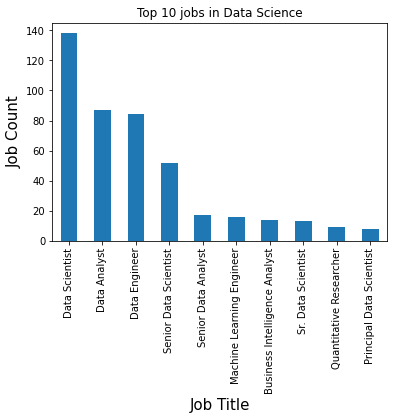

In [ ]:
df["Job Title"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 jobs in Data Science")
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Job Count",fontsize=15)
plt.show()

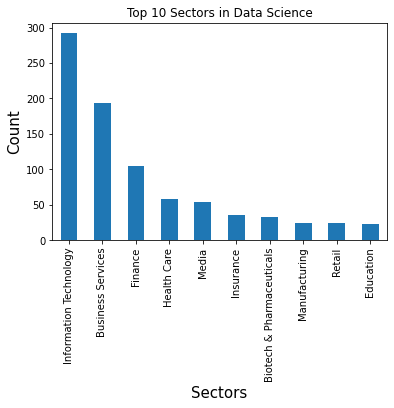

In [ ]:
df["Sector"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Sectors in Data Science")
plt.xlabel("Sectors",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

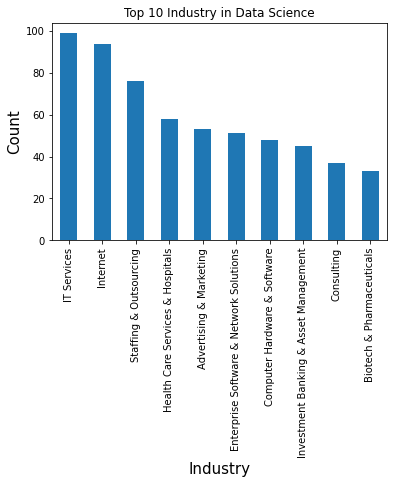

In [ ]:
df["Industry"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Industry in Data Science")
plt.xlabel("Industry",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

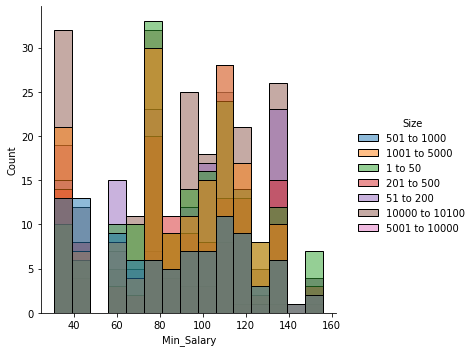

In [ ]:
sns.displot(df, x="Min_Salary",hue="Size")

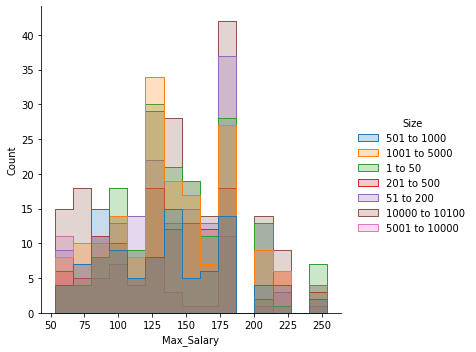

In [ ]:
sns.displot(df, x="Max_Salary",hue="Size",element="step")

In [ ]:
df['Average_Salary'] = df[['Min_Salary', 'Max_Salary']].mean(axis = 1)


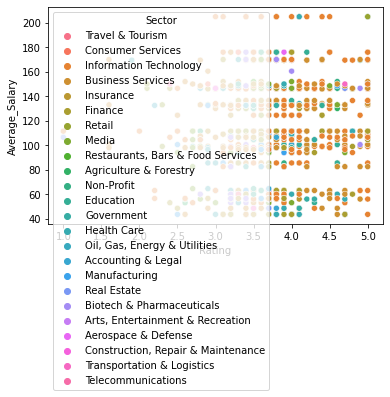

In [ ]:
sns.scatterplot(data=df, x="Rating", y="Average_Salary",hue="Sector")

In [ ]:
df['Average_Size'] = df[['Min_Size', 'Max_Size']].mean(axis = 1)


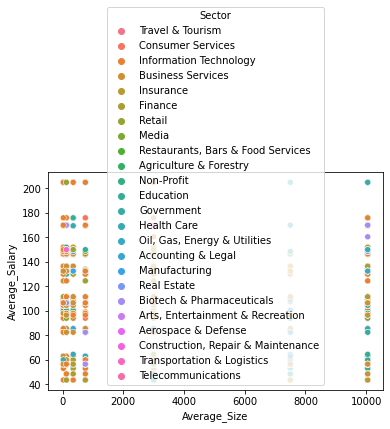

In [ ]:
sns.scatterplot(data=df, x="Average_Size", y="Average_Salary",hue="Sector")

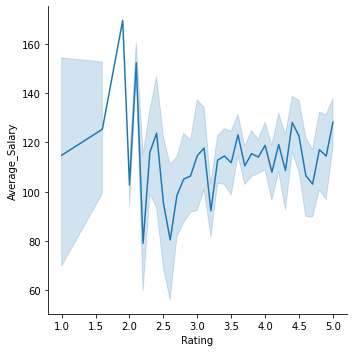

In [ ]:
sns.relplot(x='Rating',y='Average_Salary',data=df,kind='line')

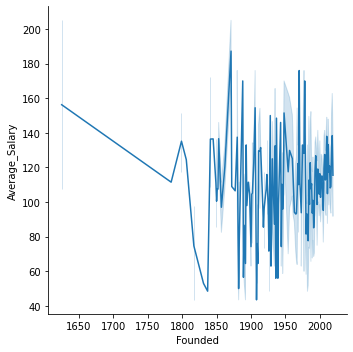

In [ ]:
sns.relplot(x='Founded',y='Average_Salary',data=df,kind='line')

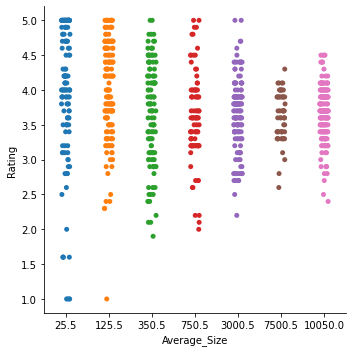

In [ ]:
sns.catplot(x='Average_Size',y='Rating',data = df)

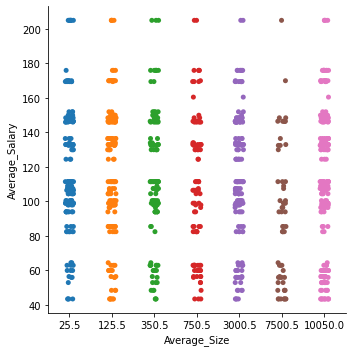

In [ ]:
sns.catplot(x='Average_Size',y='Average_Salary',data = df)

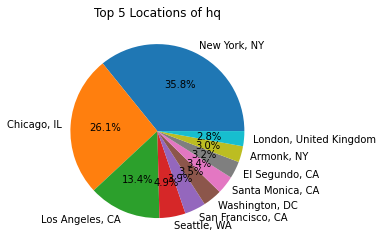

In [ ]:
df["Headquarters"].value_counts().head(10).plot.pie(y="Headquarters",autopct="%1.1f%%")
plt.title("Top 5 Locations of hq")
plt.axis("off")
plt.show()

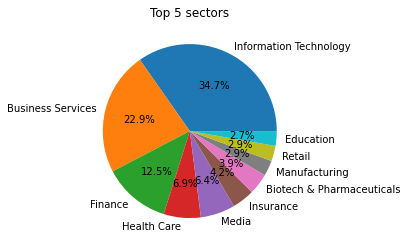

In [ ]:
df["Sector"].value_counts().head(10).plot.pie(y="Sector",autopct="%1.1f%%")
plt.title("Top 5 sectors")
plt.axis("off")
plt.show()

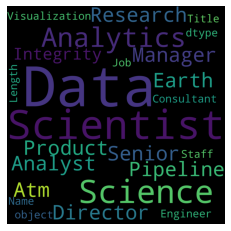

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'black',height =3000,width = 3000,).generate(str(df["Job Title"]))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()